In [2]:
from sklearn.datasets import fetch_california_housing

import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt



In [3]:
class SmallMLP(nn.Module):
    def __init__(self, input_dim):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(input_dim, 32),
            nn.ReLU(),
            nn.Linear(32, 16),
            nn.ReLU(),
            nn.Linear(16, 1)
        )

    def forward(self, x):
        return self.net(x)

In [15]:
# Load and prepare data
def load_data(batch_size=32):
    data = fetch_california_housing()
    X_train, X_test, y_train, y_test = train_test_split(
        data.data, data.target, test_size=0.2, random_state=42)

    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    X_train, X_val, y_train, y_val = train_test_split(
        X_train, y_train, test_size=0.2, random_state=42)

    def to_loader(x, y):
        return DataLoader(
            TensorDataset(torch.tensor(x, dtype=torch.float32),
                          torch.tensor(y, dtype=torch.float32).unsqueeze(1)),
            batch_size=batch_size)

    return to_loader(X_train, y_train), to_loader(X_val, y_val), to_loader(X_test, y_test), X_train.shape[1]

# Optimizer factory
def get_optimizer(name, parameters, lr=1e-3):
    if name == 'SGD':
        return torch.optim.SGD(parameters, lr=lr)
    elif name == 'SGD_momentum':
        return torch.optim.SGD(parameters, lr=lr, momentum=0.9)
    elif name == 'Adam':
        return torch.optim.Adam(parameters, lr=lr)
    elif name == 'RMSprop':
        return torch.optim.RMSprop(parameters, lr=lr)
    elif name == 'Adagrad':
        return torch.optim.Adagrad(parameters, lr=lr)
    elif name == 'Rprop':
        return torch.optim.Rprop(parameters)
    else:
        raise ValueError(f"Unsupported optimizer: {name}")

# Train and evaluate model
def run_experiment(optimizer_name='Adam', epochs=10):
    train_loader, val_loader, test_loader, input_dim = load_data()
    model = SmallMLP(input_dim)
    optimizer = get_optimizer(optimizer_name, model.parameters(), lr=1e-3)
    criterion = nn.MSELoss()

    train_loss, val_loss = [], []

    for epoch in range(epochs):
        model.train()
        total_loss = 0
        for xb, yb in train_loader:
            optimizer.zero_grad()
            pred = model(xb)
            loss = criterion(pred, yb)
            loss.backward()
            optimizer.step()
            total_loss += loss.item() * xb.size(0)
        train_loss.append(total_loss / len(train_loader.dataset))

        model.eval()
        with torch.no_grad():
            val_total = sum(criterion(model(xb), yb).item() * xb.size(0) for xb, yb in val_loader)
        val_loss.append(val_total / len(val_loader.dataset))

        print(f"Epoch {epoch+1}: Train Loss = {train_loss[-1]:.4f}, Val Loss = {val_loss[-1]:.4f}")

    # Plot loss curves
    plt.plot(train_loss, label='Train Loss')
    plt.plot(val_loss, label='Validation Loss')
    plt.title(f"Loss Curve - Optimizer: {optimizer_name}")
    plt.xlabel("Epoch")
    plt.ylabel("MSE Loss")
    plt.legend()
    plt.grid(True)
    plt.show()

    return model


Epoch 1: Train Loss = 1.1806, Val Loss = 0.5550
Epoch 2: Train Loss = 0.4531, Val Loss = 0.4573
Epoch 3: Train Loss = 0.4152, Val Loss = 0.4279
Epoch 4: Train Loss = 0.3921, Val Loss = 0.4101
Epoch 5: Train Loss = 0.3773, Val Loss = 0.3975
Epoch 6: Train Loss = 0.3666, Val Loss = 0.3874
Epoch 7: Train Loss = 0.3577, Val Loss = 0.3783
Epoch 8: Train Loss = 0.3496, Val Loss = 0.3707
Epoch 9: Train Loss = 0.3421, Val Loss = 0.3625
Epoch 10: Train Loss = 0.3345, Val Loss = 0.3544


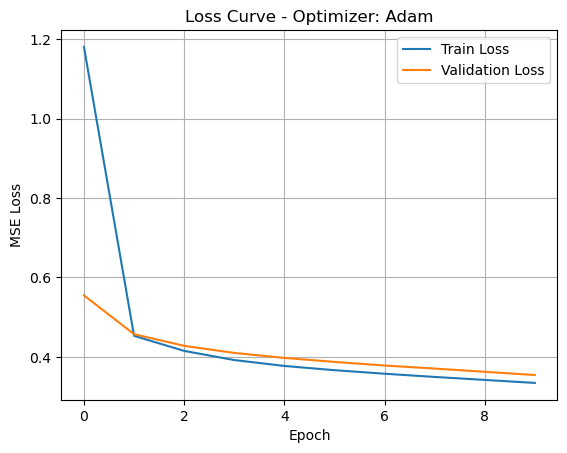

SmallMLP(
  (net): Sequential(
    (0): Linear(in_features=8, out_features=32, bias=True)
    (1): ReLU()
    (2): Linear(in_features=32, out_features=16, bias=True)
    (3): ReLU()
    (4): Linear(in_features=16, out_features=1, bias=True)
  )
)

In [22]:

# Run example
# You can change optimizer_name to 'SGD', 'SGD_momentum', 'RMSprop', 'Adagrad'
run_experiment(optimizer_name='Adam')

Epoch 1: Train Loss = 2.4711, Val Loss = 1.3820
Epoch 2: Train Loss = 0.8502, Val Loss = 0.8215
Epoch 3: Train Loss = 0.6715, Val Loss = 0.6863
Epoch 4: Train Loss = 0.6218, Val Loss = 0.6477
Epoch 5: Train Loss = 0.5925, Val Loss = 0.6201
Epoch 6: Train Loss = 0.5689, Val Loss = 0.5964
Epoch 7: Train Loss = 0.5494, Val Loss = 0.5764
Epoch 8: Train Loss = 0.5332, Val Loss = 0.5600
Epoch 9: Train Loss = 0.5197, Val Loss = 0.5463
Epoch 10: Train Loss = 0.5084, Val Loss = 0.5347


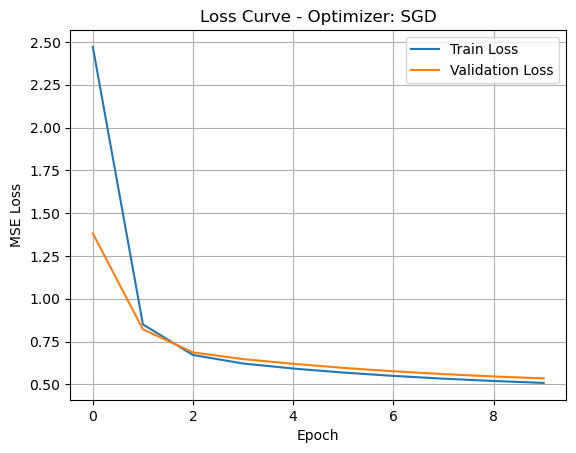

SmallMLP(
  (net): Sequential(
    (0): Linear(in_features=8, out_features=32, bias=True)
    (1): ReLU()
    (2): Linear(in_features=32, out_features=16, bias=True)
    (3): ReLU()
    (4): Linear(in_features=16, out_features=1, bias=True)
  )
)

In [11]:
run_experiment(optimizer_name='SGD')

Epoch 1: Train Loss = 0.8348, Val Loss = 0.5184
Epoch 2: Train Loss = 0.4400, Val Loss = 0.4432
Epoch 3: Train Loss = 0.3980, Val Loss = 0.4149
Epoch 4: Train Loss = 0.3788, Val Loss = 0.3975
Epoch 5: Train Loss = 0.3648, Val Loss = 0.3829
Epoch 6: Train Loss = 0.3530, Val Loss = 0.3719
Epoch 7: Train Loss = 0.3431, Val Loss = 0.3657
Epoch 8: Train Loss = 0.3350, Val Loss = 0.3629
Epoch 9: Train Loss = 0.3285, Val Loss = 0.3598
Epoch 10: Train Loss = 0.3224, Val Loss = 0.3544


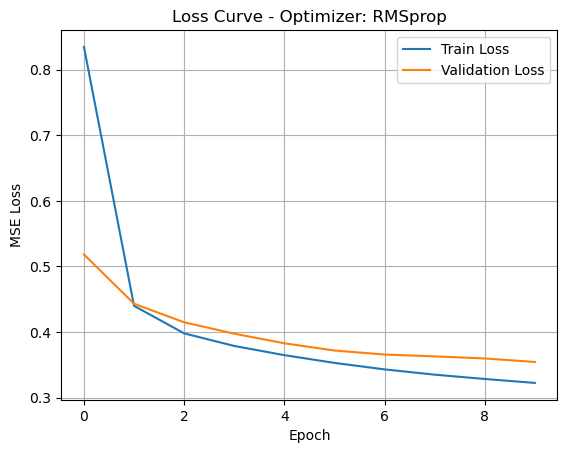

SmallMLP(
  (net): Sequential(
    (0): Linear(in_features=8, out_features=32, bias=True)
    (1): ReLU()
    (2): Linear(in_features=32, out_features=16, bias=True)
    (3): ReLU()
    (4): Linear(in_features=16, out_features=1, bias=True)
  )
)

In [12]:
run_experiment(optimizer_name='RMSprop')

Epoch 1: Train Loss = 3.7421, Val Loss = 3.0667
Epoch 2: Train Loss = 2.4450, Val Loss = 2.2486
Epoch 3: Train Loss = 1.7687, Val Loss = 1.8314
Epoch 4: Train Loss = 1.4000, Val Loss = 1.6064
Epoch 5: Train Loss = 1.1894, Val Loss = 1.4721
Epoch 6: Train Loss = 1.0616, Val Loss = 1.3830
Epoch 7: Train Loss = 0.9792, Val Loss = 1.3182
Epoch 8: Train Loss = 0.9228, Val Loss = 1.2672
Epoch 9: Train Loss = 0.8819, Val Loss = 1.2234
Epoch 10: Train Loss = 0.8504, Val Loss = 1.1853


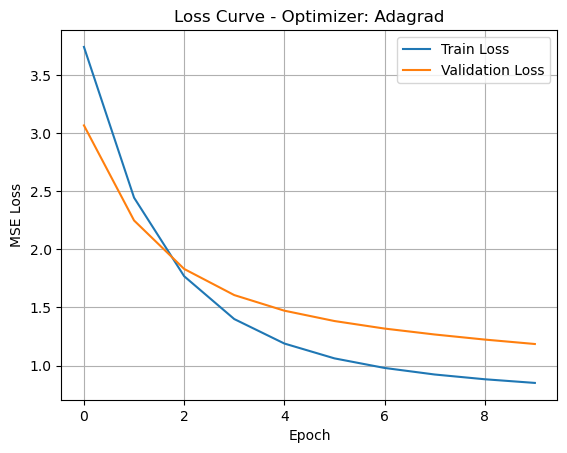

SmallMLP(
  (net): Sequential(
    (0): Linear(in_features=8, out_features=32, bias=True)
    (1): ReLU()
    (2): Linear(in_features=32, out_features=16, bias=True)
    (3): ReLU()
    (4): Linear(in_features=16, out_features=1, bias=True)
  )
)

In [13]:

run_experiment(optimizer_name='Adagrad')

Epoch 1: Train Loss = 0.9700, Val Loss = 0.5618
Epoch 2: Train Loss = 0.4956, Val Loss = 0.4919
Epoch 3: Train Loss = 0.4531, Val Loss = 0.4635
Epoch 4: Train Loss = 0.4306, Val Loss = 0.4433
Epoch 5: Train Loss = 0.4147, Val Loss = 0.4267
Epoch 6: Train Loss = 0.4003, Val Loss = 0.4119
Epoch 7: Train Loss = 0.3889, Val Loss = 0.4024
Epoch 8: Train Loss = 0.3797, Val Loss = 0.3952
Epoch 9: Train Loss = 0.3722, Val Loss = 0.3892
Epoch 10: Train Loss = 0.3651, Val Loss = 0.3834


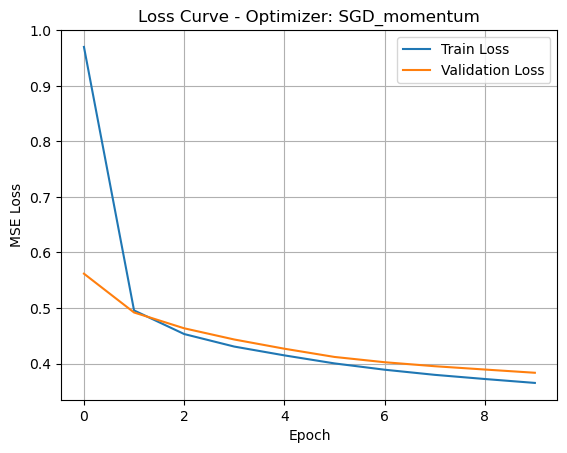

SmallMLP(
  (net): Sequential(
    (0): Linear(in_features=8, out_features=32, bias=True)
    (1): ReLU()
    (2): Linear(in_features=32, out_features=16, bias=True)
    (3): ReLU()
    (4): Linear(in_features=16, out_features=1, bias=True)
  )
)

In [14]:
run_experiment(optimizer_name='SGD_momentum')

Epoch 1: Train Loss = 0.6092, Val Loss = 0.5926
Epoch 2: Train Loss = 0.5097, Val Loss = 0.5853
Epoch 3: Train Loss = 0.5062, Val Loss = 0.5806
Epoch 4: Train Loss = 0.5038, Val Loss = 0.5767
Epoch 5: Train Loss = 0.5018, Val Loss = 0.5734
Epoch 6: Train Loss = 0.5002, Val Loss = 0.5704
Epoch 7: Train Loss = 0.4987, Val Loss = 0.5679
Epoch 8: Train Loss = 0.4974, Val Loss = 0.5655
Epoch 9: Train Loss = 0.4962, Val Loss = 0.5634
Epoch 10: Train Loss = 0.4951, Val Loss = 0.5613


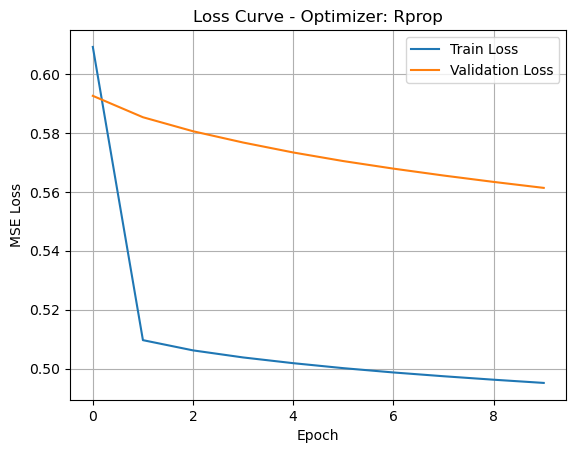

SmallMLP(
  (net): Sequential(
    (0): Linear(in_features=8, out_features=32, bias=True)
    (1): ReLU()
    (2): Linear(in_features=32, out_features=16, bias=True)
    (3): ReLU()
    (4): Linear(in_features=16, out_features=1, bias=True)
  )
)

In [17]:
run_experiment(optimizer_name='Rprop')

In [18]:
def test_loss(model, test_loader, criterion):
    model.eval()
    with torch.no_grad():
        loss = sum(criterion(model(xb), yb).item() * xb.size(0) for xb, yb in test_loader)
    return loss / len(test_loader.dataset)


In [19]:
optimizers = ['SGD', 'SGD_momentum', 'Adam', 'RMSprop', 'Adagrad', 'Rprop']
test_results = {}

# Run all optimizers and record test performance
for opt in optimizers:
    print(f"\nRunning optimizer: {opt}")
    train_loader, val_loader, test_loader, input_dim = load_data()
    model = SmallMLP(input_dim)
    optimizer = get_optimizer(opt, model.parameters(), lr=1e-3)
    criterion = nn.MSELoss()
    
    # Train
    train_loss, val_loss = [], []
    for epoch in range(10):  # or 20 if time permits
        model.train()
        for xb, yb in train_loader:
            optimizer.zero_grad()
            pred = model(xb)
            loss = criterion(pred, yb)
            loss.backward()
            optimizer.step()

    # Evaluate
    mse_test = test_loss(model, test_loader, criterion)
    test_results[opt] = mse_test
    print(f"Test MSE for {opt}: {mse_test:.4f}")



Running optimizer: SGD
Test MSE for SGD: 0.5928

Running optimizer: SGD_momentum
Test MSE for SGD_momentum: 0.3774

Running optimizer: Adam
Test MSE for Adam: 0.3414

Running optimizer: RMSprop
Test MSE for RMSprop: 0.3600

Running optimizer: Adagrad
Test MSE for Adagrad: 0.8571

Running optimizer: Rprop
Test MSE for Rprop: 0.5524


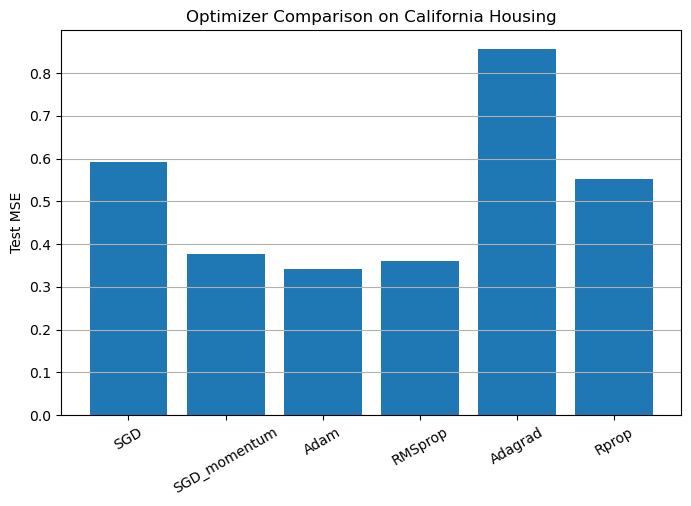

In [20]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.bar(test_results.keys(), test_results.values())
plt.ylabel("Test MSE")
plt.title("Optimizer Comparison on California Housing")
plt.xticks(rotation=30)
plt.grid(True, axis='y')
plt.show()
